In [1]:
import pickle
from pathlib import Path
from periodictable import elements
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import exfor_tools

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [3]:
from query_elastic import print_failed_parses, query_elastic_data, reattempt_parse

In [4]:
import jitr

In [5]:
proton = (1, 1)
neutron = (1, 0)

In [6]:
target =(116, 50)

In [7]:
(
    (entries_pp, failed_parses_pp),
    (entries_ppr, failed_parses_ppr),
    (entries_nn, failed_parses_nn),
) = query_elastic_data(target)


Parsing (p,p) ...
Found subentry C0893030 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry O0211016 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA', 'ERR-T']

Succesfully parsed 2 entries for (p,p)
Failed to parse 0 entries



Parsing (p,p) ratio ...
Found subentry C1019029 with the following columns:
['ERR-S', 'EN', 'ANG-CM', 'DATA']
Found subentry O0169016 with the following columns:
['EN', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']
Found subentry O0211008 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']
Failed to parse subentry O0211008:
	Ambiguous statistical error labels:
DATA-ERR, ERR-T
Found subentry O0434010 with the following columns:
['ERR-S', 'EN', 'ANG-ERR', 'DATA-ERR', 'ERR-S', 'ANG-CM', 'DATA']
Failed to parse subentry O0434010:
	Error while parsing O0434010: Expected only one ERR-S column, found 2
Found subentry O0788014 with the following columns:
['EN', 'EN-ERR', 'ANG-ERR-D', 

# $(p,p)$

## Handle failed parses for $(p,p)$

In [8]:
print_failed_parses(failed_parses=failed_parses_pp)

## Reject none-useful, discrepant our outlying experiments

# $(p,p)$ ratio

## handle failed parses for $(p,p)$ ratio

In [9]:
print_failed_parses(failed_parses=failed_parses_ppr)

Entry: O0211
Ambiguous statistical error labels:
DATA-ERR, ERR-T
Entry: O0434
Error while parsing O0434010: Expected only one ERR-S column, found 2


In [12]:
entries_ppr["O0211"] = reattempt_parse(
    failed_parses_ppr["O0211"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211008 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


I can't figure out what the error bars are supposed to be for entry O0434

## Reject non-useful, discrepant our outlying experiments

## handle failed parses for $(n,n)$ ratio

In [13]:
print_failed_parses(failed_parses=failed_parses_nn)

# Plotting

## Plot $(p,p)$

In [14]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(entries_pp)

In [15]:
[[m.Einc for m in l] for l in measurements_categorized]

[[16.0], [61.4]]

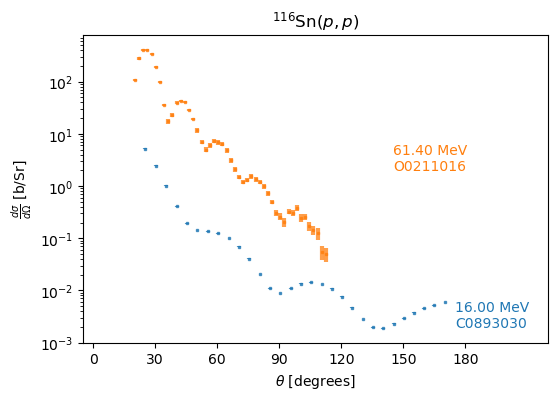

In [18]:
n_per_plot = 10
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 4))
if not isinstance(axes,np.ndarray):
    axes = [axes]
for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=1000,
        data_symbol=list(entries_pp.values())[0].data_symbol,
        rxn_label=list(entries_pp.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.002,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
    axes[i].set_xlim([-5, 220])

## plot $(p,p)$ ratio

In [20]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(entries_ppr)

In [21]:
[[(m.subentry, m.Einc) for m in l] for l in measurements_categorized]

[[('O0169016', 20.4)],
 [('C1019029', 22.2)],
 [('O0788014', 49.35)],
 [('O0211008', 61.4)]]

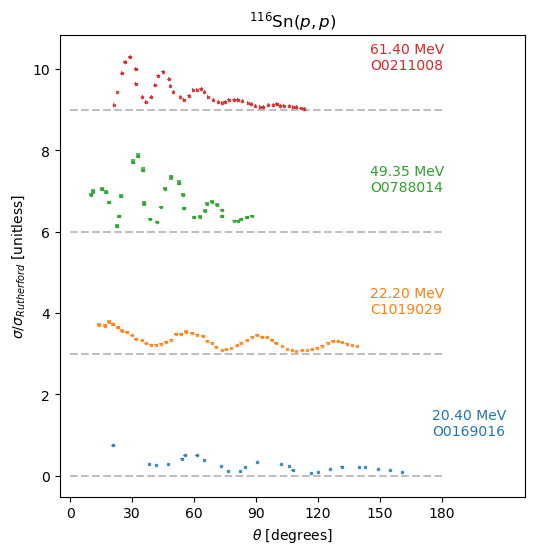

In [25]:
n_per_plot = 9
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))
if not isinstance(axes,np.ndarray):
    axes = [axes]

for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot
    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=3,
        data_symbol=list(entries_ppr.values())[0].data_symbol,
        rxn_label=list(entries_ppr.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        log=False,
        draw_baseline=True
    )
    axes[i].set_xlim([-5, 220])

## Plot $(n,n)$

In [26]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(entries_nn)

In [27]:
[[m.Einc for m in l] for l in measurements_categorized]

[[11.0], [13.925], [24.0]]

(-20.0, 180.0)

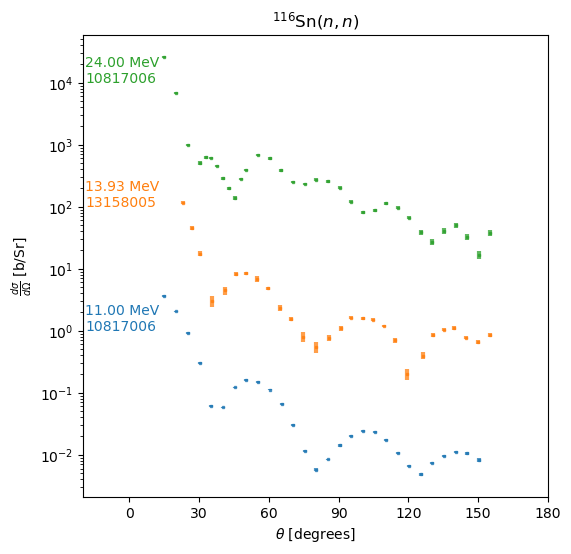

In [32]:
n_per_plot = 6
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))
if not isinstance(axes,np.ndarray):
    axes = [axes]

for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_nn.values())[0].data_symbol,
        rxn_label=list(entries_nn.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
axes[0].set_xlim([-20, 180])


# Write data to disk

In [33]:
A, Z = target
with open(f"{elements[Z]}{A}_diff_xs.pkl", "wb") as f:
    pickle.dump({"n,n": entries_nn, "p,p": { "absolute" :  entries_pp , "ratio" : entries_ppr }}, f)